## Import Thư viện

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Đọc dữ liệu

In [2]:
df = pd.read_excel('Vietnam_Movies.xlsx')
df.head(3)

,Id,Title,Original Title,Original Language,Overview,Revenue,Budget,Runtime,Release Date,Vote Average,Vote Count,Genres,Production Companies,Production Countries,Spoken Languages,Director,Stars
0,383200,Bitcoin Heist,Siêu Trộm,vi,Để bắt tên trộm bị truy nã gắt gao nhất thế gi...,562919.0,0.0,110,2016-02-04 00:00:00,5.8,792,"['Action', 'Comedy']",['Old Photo Films'],['Vietnam'],"['Tiếng Anh', 'Tiếng Việt']",Ham Tran,"['Nhung Kate', 'Thanh Pham', 'Petey Majik Nguy..."
1,1234943,The Secret of Snake Island,The Secret of Snake Island,vi,NaN,0.0,0.0,0,2020-01-01 00:00:00,0.0,0,[],[],['Vietnam'],['Tiếng Việt'],Diep Thien Hanh,"['Duong Minh', 'Kha Ngan', 'Dich Duong']"
2,663747,Tiền Nhiều Để Làm Gì,Tiền Nhiều Để Làm Gì,vi,NaN,27699.0,0.0,0,2020-01-30 00:00:00,0.0,0,['Comedy'],[],['Vietnam'],['Tiếng Việt'],Luu Huynh,"['Duong Chi Cong', 'Ha Viet Dung', 'Hiêp Gà', ..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2193 non-null   int64  
 1   Title                 2193 non-null   object 
 2   Original Title        2193 non-null   object 
 3   Original Language     2193 non-null   object 
 4   Overview              2083 non-null   object 
 5   Revenue               2193 non-null   float64
 6   Budget                2193 non-null   float64
 7   Runtime               2193 non-null   int64  
 8   Release Date          2193 non-null   object 
 9   Vote Average          2193 non-null   float64
 10  Vote Count            2193 non-null   int64  
 11  Genres                2193 non-null   object 
 12  Production Companies  2193 non-null   object 
 13  Production Countries  2193 non-null   object 
 14  Spoken Languages      2193 non-null   object 
 15  Director             

In [4]:
print(f'Số dòng: {df.shape[0]}')
print(f'Số cột: {df.shape[1]}')

Số dòng: 2193
Số cột: 17


In [5]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df = df.drop(columns=['Id'])

In [6]:
vietnam_movies = df[df['Original Language'] == 'vi']

## Tiền xử lí dữ liệu

### Xử lí dữ liệu trùng lặp

In [7]:
print(f"Dữ liệu có {df.duplicated().sum()} dòng bị trùng.")

Dữ liệu có 0 dòng bị trùng.


### Xử lí dữ liệu thiếu

In [8]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False).reset_index()

missing_values.columns = ["Cột", "Số lượng giá trị thiếu"]

missing_values["Tỉ lệ giá trị thiếu (%)"] = missing_values["Số lượng giá trị thiếu"] / df.shape[0] * 100
missing_values


,Cột,Số lượng giá trị thiếu,Tỉ lệ giá trị thiếu (%)
0,Stars,1737,79.206566
1,Director,1730,78.887369
2,Overview,110,5.015960


- Đối với các phim Việt

In [9]:
missing_values = vietnam_movies.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False).reset_index()

missing_values.columns = ["Cột", "Số lượng giá trị thiếu"]

missing_values["Tỉ lệ giá trị thiếu (%)"] = missing_values["Số lượng giá trị thiếu"] / vietnam_movies.shape[0] * 100
missing_values

,Cột,Số lượng giá trị thiếu,Tỉ lệ giá trị thiếu (%)
0,Overview,108,23.580786
1,Stars,12,2.620087
2,Director,4,0.873362


## Phân tích thống kê cho các trường dữ liệu

In [10]:
numeric_cols = df.select_dtypes(exclude='object').columns
cate_cols = df.select_dtypes(include='object').columns

### Biến định lượng

In [11]:
numeric_cols

Index(['Revenue', 'Budget', 'Runtime', 'Release Date', 'Vote Average',
       'Vote Count'],
      dtype='object')

Với mỗi cột nhóm sẽ tính các giá trị thống kê (min, max, std ...), khoảng tin cậy 95% của giá trị trung bình, kiểm tra phân phối của dữ liệu

$$\text{Khoảng tin cậy 95\% của giá trị trung bình} = \bar{x} \pm z_{1 - \frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}$$ 

Với:

- $\bar{x}$: giá trị trung bình của mẫu
- $z_{1 - \frac{\alpha}{2}}$: giá trị z-score tương ứng với $\alpha = 0.05$
- $s$: độ lệch chuẩn của mẫu
- $n$: số lượng mẫu



#### **Revenue**

In [12]:
vietnam_movies[vietnam_movies['Revenue']!=0]['Revenue'].describe().round(2)

count         229.00
mean      1637583.69
std       2796444.07
min           975.00
25%        124606.00
50%        665224.00
75%       2136495.00
max      22119910.00
Name: Revenue, dtype: float64

In [13]:
revenue = vietnam_movies[vietnam_movies['Revenue'] != 0]['Revenue']

# Tính khoảng tin cậy 95% cho trung bình doanh thu
confidence_interval = stats.norm.interval(0.95, loc=np.mean(revenue), scale=stats.sem(revenue))

print(f"Khoảng tin cậy 95% cho trung bình doanh thu: {confidence_interval}")

Khoảng tin cậy 95% cho trung bình doanh thu: (1275393.6645492108, 1999773.718635504)


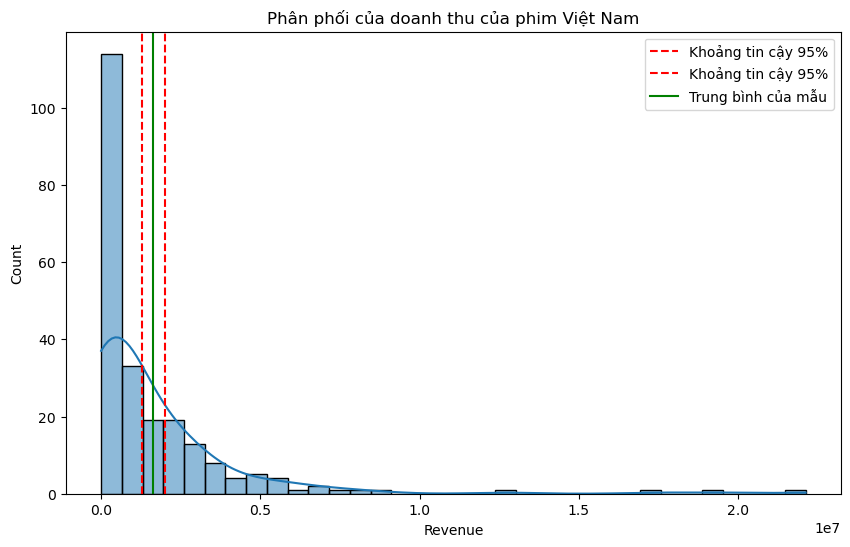

In [14]:
# histogram của doanh thu với khoang tin cậy 95%
plt.figure(figsize=(10, 6))
sns.histplot(revenue, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(revenue.mean(), color='green', label='Trung bình của mẫu')
plt.legend()
plt.title('Phân phối của doanh thu của phim Việt Nam')
plt.show()

**Nhận xét**

- Doanh thu của các bộ phim Việt Nam có phân phối lệch phải, khoảng giá trị khá rộng từ khoảng 1000 đô đến hơn 22 triệu đô. 

- Phần các bộ phim Việt có doanh thu từ vài trăm nghìn đô đến khoảng 2 triệu đô. Tuy nhiên vẫn có các trường hợp ngoại lệ với doanh thu rất thấp hoặc rất cao.

- Doanh thu trung bình của các bộ phim Việt Nam từ 1.18 triệu đô đến gần 2 triệu đô với khoảng tin cậy 95%

#### **Budget**

In [15]:
vietnam_movies[vietnam_movies['Budget']!=0]['Budget'].describe().round(2)

count        101.00
mean      906335.47
std       925063.30
min         8000.00
25%       300000.00
50%       669159.00
75%      1023219.00
max      6000000.00
Name: Budget, dtype: float64

In [16]:
budget = vietnam_movies[vietnam_movies['Budget'] != 0]['Budget']

# Tính khoảng tin cậy 95% cho trung bình
confidence_interval = stats.norm.interval(0.95, loc=np.mean(budget), scale=stats.sem(budget))

print(f"Khoảng tin cậy 95% cho trung bình ngân sách: {confidence_interval}")

Khoảng tin cậy 95% cho trung bình ngân sách: (725926.1938718867, 1086744.7376962355)


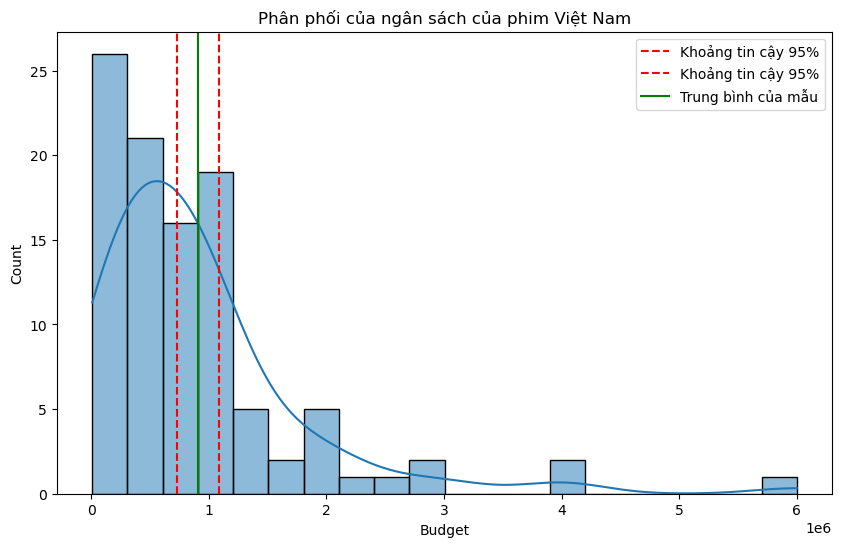

In [17]:
# histogram của ngân sách với khoang tin cậy 95%
plt.figure(figsize=(10, 6))
sns.histplot(budget, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(budget.mean(), color='green', label='Trung bình của mẫu')
plt.legend()
plt.title('Phân phối của ngân sách của phim Việt Nam')
plt.show()

**Nhận xét**

- Ngân sách của các bộ phim Việt Nam có phân phối lệch phải, khoảng giá trị khá rộng từ khoảng 8000 đô đến 6 triệu đô.

- Phần lớn các bộ phim Việt có ngân sách từ vài trăm nghìn đô đến 2 triệu đô. Tuy nhiên vẫn có các trường hợp ngoại lệ với ngân sách rất thấp hoặc rất cao.

- Ngân sách trung bình của các bộ phim Việt Nam từ 715 nghìn đô đến 1.1 triệu đô với khoảng tin cậy 95%

#### **Runtime**

In [18]:
vietnam_movies[vietnam_movies['Runtime']!=0]['Runtime'].describe()

count    399.000000
mean      97.887218
std       16.042338
min       11.000000
25%       90.000000
50%       98.000000
75%      107.000000
max      179.000000
Name: Runtime, dtype: float64

In [19]:
runtime = vietnam_movies[vietnam_movies['Runtime'] != 0]['Runtime']

# Tính khoảng tin cậy 95% cho trung bình
confidence_interval = stats.norm.interval(0.95, loc=np.mean(runtime), scale=stats.sem(runtime))

print(f"Khoảng tin cậy 95% cho trung bình: {confidence_interval}")

Khoảng tin cậy 95% cho trung bình: (96.31312900836664, 99.46130708185893)


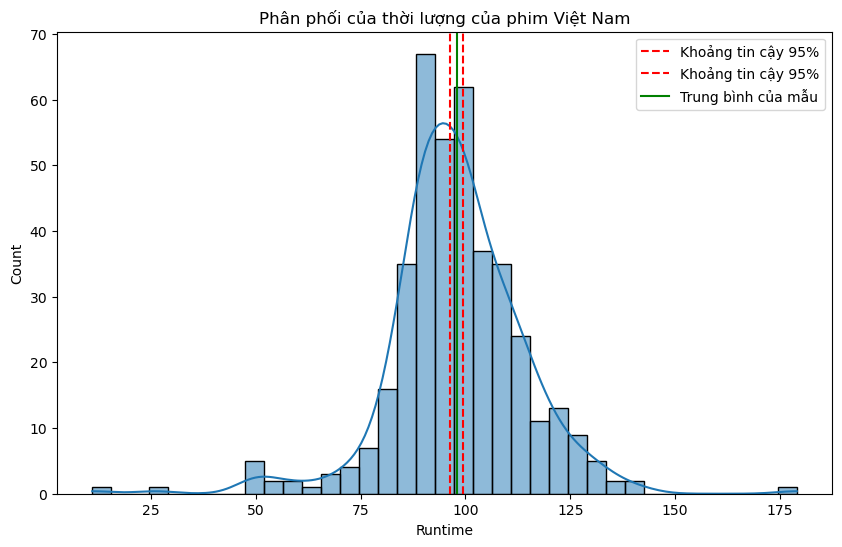

In [20]:
# histogram với khoang tin cậy 95%
plt.figure(figsize=(10, 6))
sns.histplot(runtime, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(runtime.mean(), color='green', label='Trung bình của mẫu')
plt.legend()
plt.title('Phân phối của thời lượng của phim Việt Nam')
plt.show()

**Nhận xét**

- Thời lượng của các bộ phim Việt Nam có phân phối gần giống với phân phối chuẩn, khoảng giá trị từ 11 đến 179 phút

- Phần lớn các bộ phim Việt có thời lượng từ 75 đến 125 phút. Tuy nhiên vẫn có các trường hợp ngoại lệ với thời lượng rất thấp hoặc rất cao.

- Thời lượng trung bình của các bộ phim Việt Nam từ 95 đến 99 phút với khoảng tin cậy 95%

#### **Vote Average**

In [21]:
vietnam_movies[vietnam_movies['Vote Average']!=0]['Vote Average'].describe().round(2)

count    424.00
mean       6.15
std        1.21
min        1.70
25%        5.40
50%        6.20
75%        7.00
max        9.40
Name: Vote Average, dtype: float64

In [22]:
vote_avg = vietnam_movies[vietnam_movies['Vote Average'] != 0]['Vote Average']

# Tính khoảng tin cậy 95% cho trung bình
confidence_interval = stats.norm.interval(0.95, loc=np.mean(vote_avg), scale=stats.sem(vote_avg))

print(f"Khoảng tin cậy 95% cho trung bình: {confidence_interval}")

Khoảng tin cậy 95% cho trung bình: (6.032073693268809, 6.261794231259494)


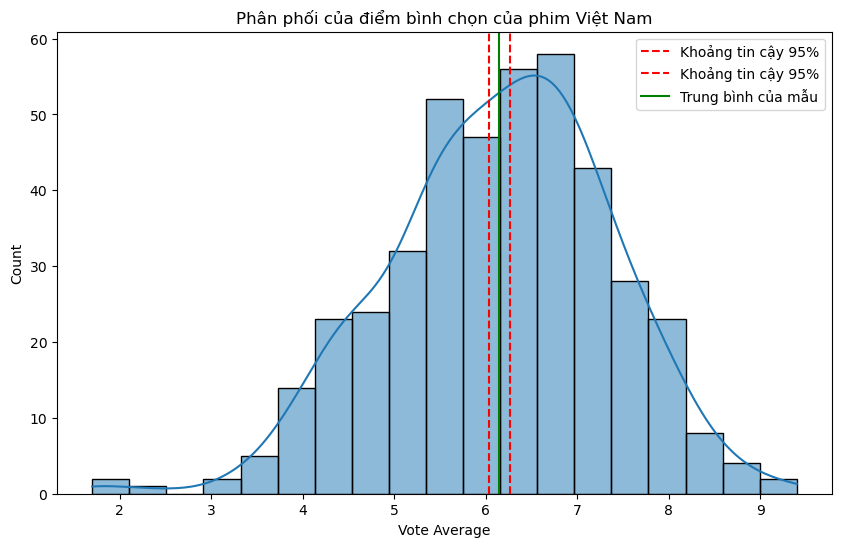

In [23]:
# histogram với khoang tin cậy 95%
plt.figure(figsize=(10, 6))
sns.histplot(vote_avg, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(vote_avg.mean(), color='green', label='Trung bình của mẫu')
plt.legend()
plt.title('Phân phối của điểm bình chọn của phim Việt Nam')
plt.show()

**Nhận xét**

- Bình chọn trung bình của các bộ phim Việt Nam có phân phối gần giống với phân phối chuẩn, có khoảng giá trị từ 1.7 đến 9.4

- Phần lớn các bộ phim Việt có điểm bình chọn từ 5.5 đến 7.5. Tuy nhiên vẫn có các trường hợp ngoại lệ với điểm bình chọn rất thấp hoặc rất cao.

- Điểm bình chọn trung bình của các bộ phim Việt Nam từ 6.1 đến 6.3 với khoảng tin cậy 95%

#### **Vote Count**

In [24]:
vietnam_movies[vietnam_movies['Vote Count']!=0]['Vote Count'].describe().round(2)

count     424.00
mean      124.17
std       211.16
min         2.00
25%        18.75
50%        49.50
75%       123.25
max      2100.00
Name: Vote Count, dtype: float64

In [25]:
vote_count = vietnam_movies[vietnam_movies['Vote Count'] != 0]['Vote Count']

# Tính khoảng tin cậy 95% cho trung bình
confidence_interval = stats.norm.interval(0.95, loc=np.mean(vote_count), scale=stats.sem(vote_count))

print(f"Khoảng tin cậy 95% cho trung bình: {confidence_interval}")

Khoảng tin cậy 95% cho trung bình: (104.07330987295626, 144.27102974968525)


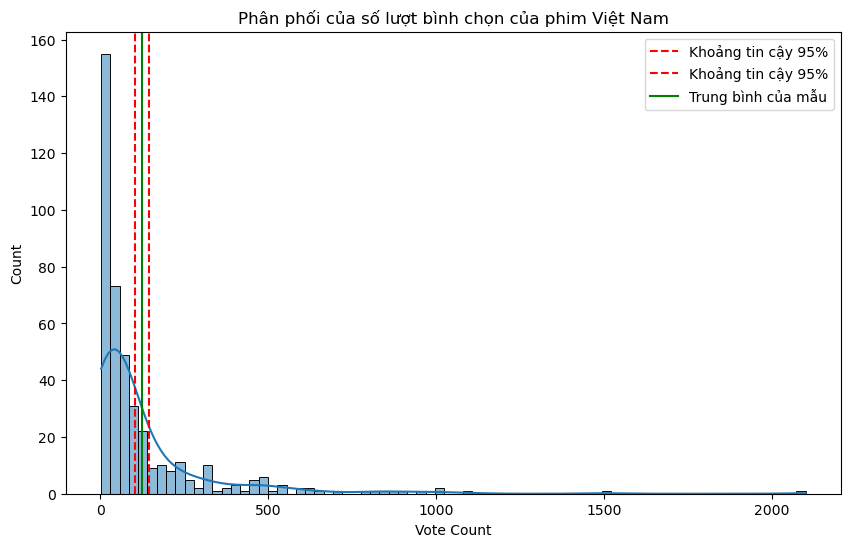

In [26]:
# histogram với khoang tin cậy 95%
plt.figure(figsize=(10, 6))
sns.histplot(vote_count, kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Khoảng tin cậy 95%')
plt.axvline(vote_count.mean(), color='green', label='Trung bình của mẫu')
plt.legend()
plt.title('Phân phối của số lượt bình chọn của phim Việt Nam')
plt.show()

**Nhận xét**

- Số lượt bình chọn của các bộ phim Việt Nam có phân phối lệch phải, có khoảng giá trị từ 2 đến 2100.

- Phần lớn các bộ phim Việt có số lượt bình chọn từ 10 đến 300. Tuy nhiên vẫn có các trường hợp ngoại lệ với số lượt bình chọn rất thấp hoặc rất cao.

- Số lượt bình chọn trung bình của các bộ phim Việt Nam từ 99 đến 137 với khoảng tin cậy 95%

### Sự tương quan giữa các biến

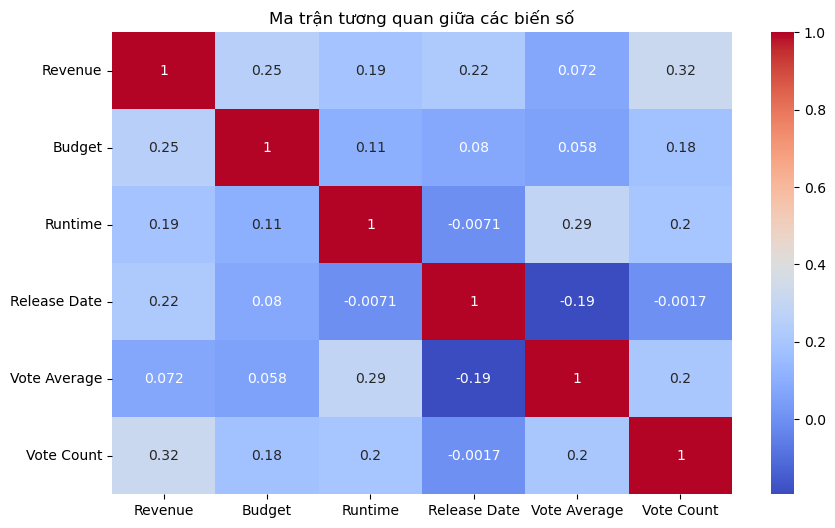

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(vietnam_movies[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các biến số')
plt.show()

<Figure size 1200x800 with 0 Axes>

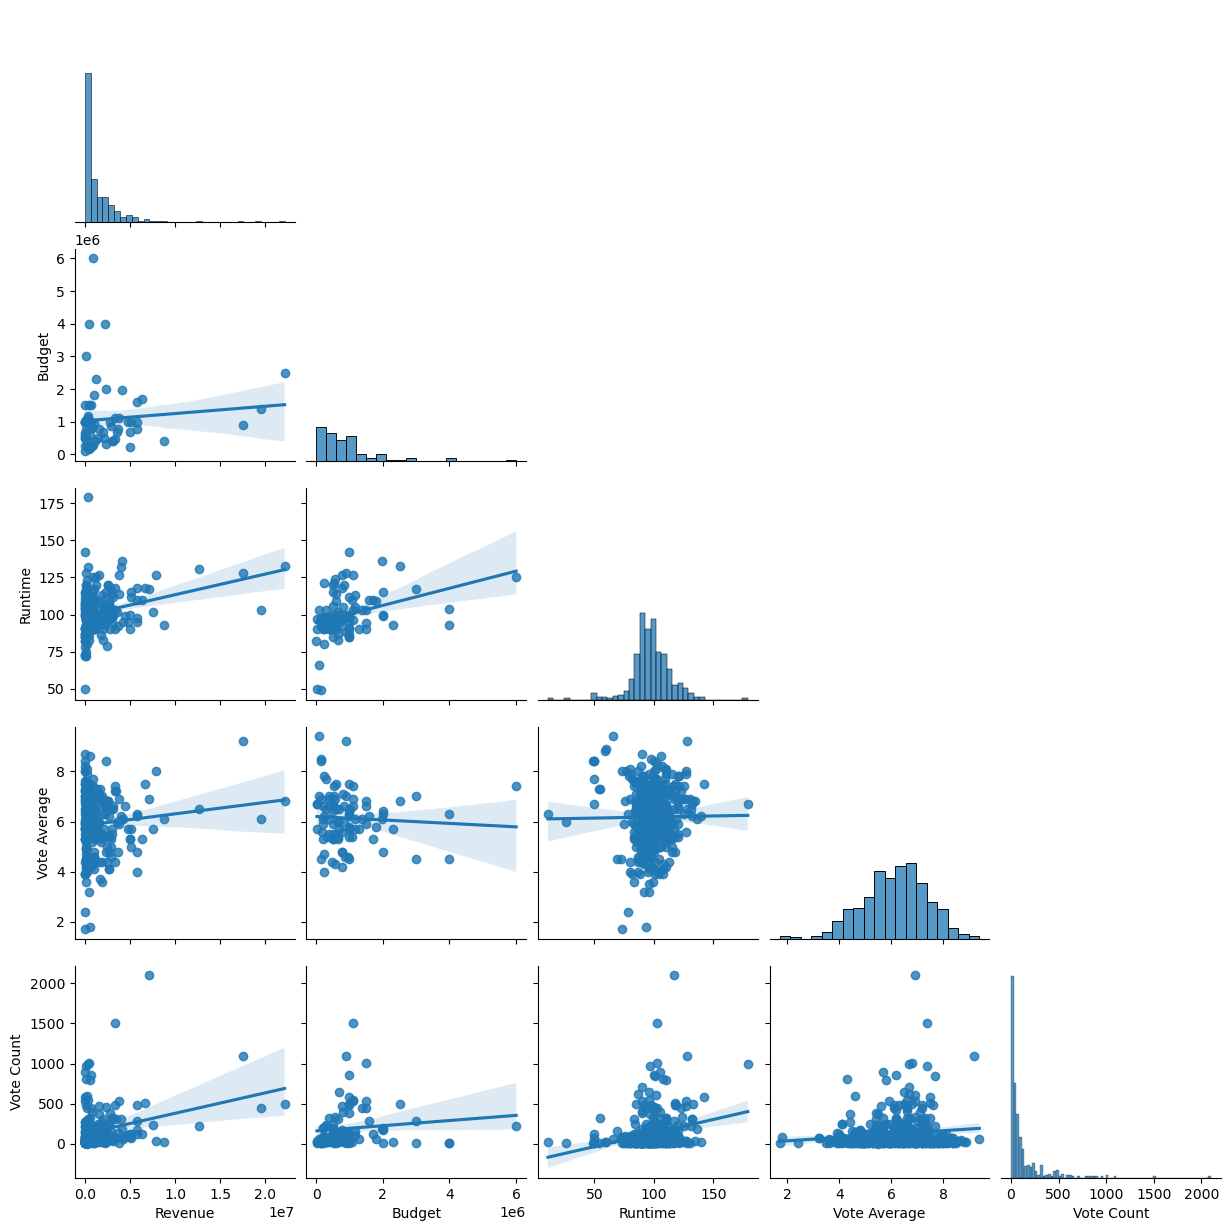

In [28]:
#pairplot cho các dòng dữ liệu có giá trị không bằng 0
# pairplot có hồi quy, chỉ trực quan tam giác dưới đường chéo
plt.figure(figsize=(12, 8))
sns.pairplot(vietnam_movies[numeric_cols][vietnam_movies[numeric_cols] != 0], kind='reg', corner=True)
plt.show()

**Nhận xét**

Dựa vào ma trận tương quan giữa các biến số cũng như biểu đồ phân tán giữa các biến số, ta có thể thấy các biến số không có tương quan nhiều với nhau. 

- Đối với ma trận tương quan, các hệ số tương quan đều có độ lớn nhỏ hơn 0.3

- Đối với biểu đồ phân tán và đường thẳng hồi quy, ta cũng không thể thấy được mối tương quan, mối quan hệ rõ ràng giữa các biến số

### Biến định tính

In [29]:
vietnam_movies[cate_cols].describe()

,Title,Original Title,Original Language,Overview,Genres,Production Companies,Production Countries,Spoken Languages,Director,Stars
count,458,458,458,350,458,458,458,458,454,446
unique,458,457,1,349,144,168,36,16,239,436
top,Bitcoin Heist,Táo Quậy,vi,Một doanh nhân chuyển giới Việt Nam trở nên ng...,['Drama'],[],['Vietnam'],['Tiếng Việt'],Victor Vu,[]
freq,1,2,458,2,65,238,404,418,15,5
